<a href="https://colab.research.google.com/github/tomunizua/summative_bananaguard/blob/main/Summative_Intro_to_ml_TheodoraOmunizua_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [61]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
from PIL import Image
import tensorflow as tf
import itertools
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [37]:
# ---  Data Loading and Preprocessing ---

def load_and_encode_data(csv_path, image_folder, le=None):
    """Loads data from CSV, performs label encoding, and creates a TF dataset."""

    df = pd.read_csv(csv_path)

    if le is None:  # Fit LabelEncoder only on training data
        le = LabelEncoder()
        df['class_encoded'] = le.fit_transform(df['class'])
    else:
        df['class_encoded'] = le.transform(df['class'])

    image_paths = df['filename'].apply(lambda x: os.path.join(image_folder, x)).tolist()
    labels = df['class_encoded'].tolist()

    image_paths_tensor = tf.constant(image_paths)
    labels_tensor = tf.constant(labels)

    dataset = tf.data.Dataset.from_tensor_slices((image_paths_tensor, labels_tensor))

    def process_path(image_path, label):
        image = load_image(image_path)
        return image, label

    dataset = dataset.map(process_path)
    return dataset, le  # Return the dataset and the label encoder


def load_image(image_path):
    """Loads and resizes an image from a given path."""
    image_string = tf.io.read_file(image_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image_resized = tf.image.resize(image_decoded, [128, 128])
    return image_resized


# --- Main Data Loading ---

# Define data paths (replace with your actual paths)
data_paths = {
    'train': ('/content/dataset/train/_annotations.csv', '/content/dataset/train/images'),
    'validation': ('/content/dataset/valid/_annotations.csv', '/content/dataset/valid/images'),
    'test': ('/content/dataset/test/_annotations.csv', '/content/dataset/test/images')
}

datasets = {}
le = None  # Initialize LabelEncoder outside the loop

for split, (csv_path, image_folder) in data_paths.items():
    datasets[split], le = load_and_encode_data(csv_path, image_folder, le)  # Pass le for validation and test

# Access datasets:
train_dataset = datasets['train']
valid_dataset = datasets['validation']
test_dataset = datasets['test']

# ... (Rest of your code: model training, evaluation, etc.)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [38]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import load_model

In [39]:
# --- Model Definition and Training ---

def model_1(input_shape, num_classes, epochs=10, save_path="no_optimization_model.keras"):
    """Creates, compiles, trains, and  saves a CNN model without any optimizer."""

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # No optimizer specified as per your requirement

    history = model.fit(train_dataset.batch(32),
                      validation_data=valid_dataset.batch(32),
                      epochs=epochs)

    model.save(save_path)
    print(f"Model saved to: {save_path}")

    return model, history


# --- Main Execution ---

input_shape = (128, 128, 3)  # Define input shape
num_classes = len(le.classes_)  # Define number of classes

# Create and train the model
model, history = model_1(input_shape, num_classes, epochs=10, save_path="no_optimization_model.keras")

# Load the model (if needed)
loaded_model = tf.keras.models.load_model("no_optimization_model.keras")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6308 - loss: 308.3802 - val_accuracy: 0.9894 - val_loss: 0.0746
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8776 - loss: 1.6428 - val_accuracy: 0.4539 - val_loss: 11.0176
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8403 - loss: 2.0542 - val_accuracy: 0.9858 - val_loss: 0.0597
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9153 - loss: 1.0803 - val_accuracy: 0.9894 - val_loss: 0.0399
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9603 - loss: 0.5499 - val_accuracy: 0.5426 - val_loss: 4.2350
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8993 - loss: 0.6317 - val_accuracy: 0.9894 - val_loss: 0.0396
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9626 - loss: 0.5066 - val_accuracy: 0.9894 - val_loss: 0.0416
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9580 - loss: 0.4890 - val_accuracy: 0.9078 - val_loss: 0.4337


# Task: Print out the Final Model Accuracy and plot the Loss curve

Train accuracy: 0.998
Test accuracy: 0.972


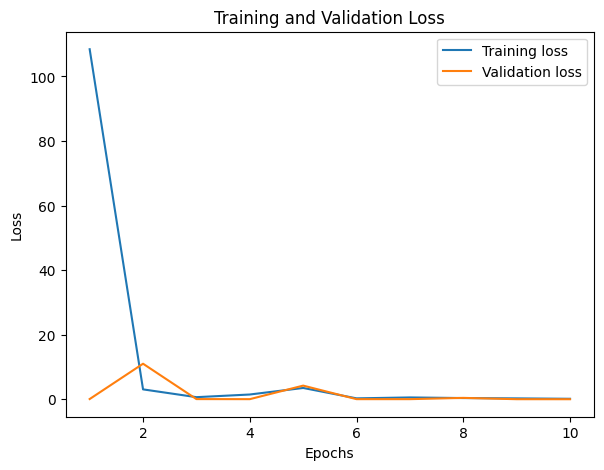

In [53]:
# --- Model Evaluation and Visualization ---

def evaluate_model(model, train_dataset, test_dataset):
    """Evaluates the model and prints train and test accuracy."""

    train_dataset_batched = train_dataset.batch(32)
    test_dataset_batched = test_dataset.batch(32)

    _, train_accuracy = model.evaluate(train_dataset_batched, verbose=0)
    _, test_accuracy = model.evaluate(test_dataset_batched, verbose=0)

    print(f'Train accuracy: {train_accuracy:.3f}')
    print(f'Test accuracy: {test_accuracy:.3f}')
    return train_accuracy, test_accuracy  # Return the accuracies


# Call the evaluation function
train_accuracy, test_accuracy = evaluate_model(model, train_dataset, test_dataset)

def loss_curve_plot(history):
    """Plots training and validation loss and accuracy curves."""

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs_range, loss, label='Training loss')
    plt.plot(epochs_range, val_loss, label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # plt.subplot(1, 2, 2)  # Accuracy plot
    # plt.plot(epochs_range, acc, 'bo', label='Training accuracy')
    # plt.plot(epochs_range, val_acc, 'r', label='Validation accuracy')
    # plt.title('Training and Validation Accuracy')
    # plt.xlabel('Epochs')
    # plt.ylabel('Accuracy')
    # plt.legend()

    # plt.tight_layout()  # Adjust layout to prevent overlap
    # plt.show()

loss_curve_plot(history)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7000 - loss: 23.7924 - val_accuracy: 0.9894 - val_loss: 0.0800
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9746 - loss: 0.2172 - val_accuracy: 0.9610 - val_loss: 0.3067
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9623 - loss: 0.2437 - val_accuracy: 0.9858 - val_loss: 0.0574
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9978 - loss: 0.0275 - val_accuracy: 0.9894 - val_loss: 0.0529
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9960 - loss: 0.0228 - val_accuracy: 0.9894 - val_loss: 0.0535
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9965 - val_loss: 0.0345
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9941 - loss: 0.0323 - val_accuracy: 0.9929 - val_loss: 0.0359
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9911 - loss: 0.0168 - val_accuracy: 0.9929 - val_loss

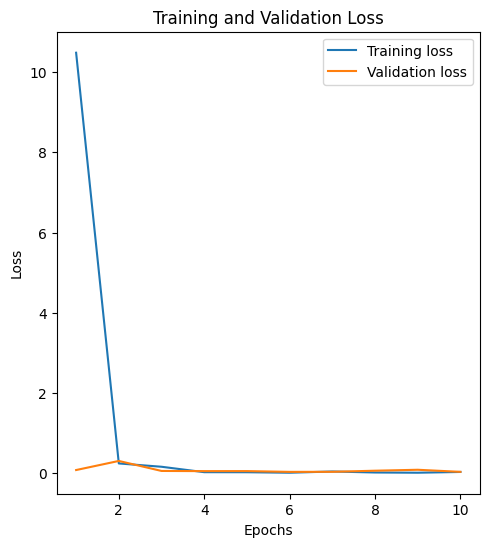

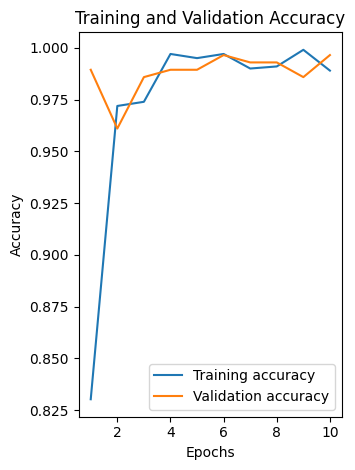

TypeError: 'numpy.int32' object is not iterable

In [60]:
def model_2(input_shape, num_classes, learning_rate=0.001, epochs=10, dropout=0.5, save_path="second_model.keras"):  # Added parameters
    """Creates and compiles a CNN model with Adam optimizer."""

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout),  # Dropout layer added
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Adam optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Define early stopping
    history = model.fit(train_dataset.batch(32),
                      validation_data=valid_dataset.batch(32),
                      epochs=epochs)

    model.save(save_path)
    print(f"Model saved to: {save_path}")
    return model, history

# --- Main Execution ---

input_shape = (128, 128, 3)  # Define input shape
num_classes = len(le.classes_)  # Define number of classes

# Create and train the model
model, history = model_2(input_shape, num_classes, epochs=10, save_path="second_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("second_model.keras")


# --- Model Evaluation and Visualization ---
def evaluate_model(model, train_dataset, test_dataset):
    """Evaluates the model and prints train and test accuracy."""

    train_dataset_batched = train_dataset.batch(32)
    test_dataset_batched = test_dataset.batch(32)

    _, train_accuracy = model.evaluate(train_dataset_batched, verbose=0)
    _, test_accuracy = model.evaluate(test_dataset_batched, verbose=0)

    print(f'Train accuracy: {train_accuracy:.3f}')
    print(f'Test accuracy: {test_accuracy:.3f}')
    return train_accuracy, test_accuracy  # Return the accuracies


# Call the evaluation function
train_accuracy, test_accuracy = evaluate_model(model, train_dataset, test_dataset)

def loss_curve_plot(history):
    """Plots training and validation loss and accuracy curves."""

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs_range, loss, label='Training loss')
    plt.plot(epochs_range, val_loss, label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs_range, acc, label='Training accuracy')
    plt.plot(epochs_range, val_acc, label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)

# Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

# Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



In [62]:
def model_3(input_shape, num_classes, dropout=0.2, learning_rate=0.001, save_path="third_model.keras"):  # RMSprop, L2
    """Creates and compiles a CNN model with RMSprop and L2 regularization."""
    regularizer = tf.keras.regularizers.l2(0.001)  # L2 regularization

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dropout(dropout),  # Dropout layer
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)  # RMSprop optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Early stopping
    history = model.fit(train_dataset.batch(32),  # Training is done here
                      validation_data=valid_dataset.batch(32),
                      epochs=10,
                      callbacks=[early_stopping])

    model.save(save_path)
    print(f"Model saved to: {save_path}")
    return model, history

# --- Main Execution ---

input_shape = (128, 128, 3)  # Define input shape
num_classes = len(le.classes_)  # Define number of classes

# Create and train the model
model, history = model_3(input_shape, num_classes, epochs=10, save_path="third_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("third_model.keras")

# --- Model Evaluation and Visualization ---
def evaluate_model(model, train_dataset, test_dataset):
    """Evaluates the model and prints train and test accuracy."""

    train_dataset_batched = train_dataset.batch(32)
    test_dataset_batched = test_dataset.batch(32)

    _, train_accuracy = model.evaluate(train_dataset_batched, verbose=0)
    _, test_accuracy = model.evaluate(test_dataset_batched, verbose=0)

    print(f'Train accuracy: {train_accuracy:.3f}')
    print(f'Test accuracy: {test_accuracy:.3f}')
    return train_accuracy, test_accuracy  # Return the accuracies


# Call the evaluation function
train_accuracy, test_accuracy = evaluate_model(model, train_dataset, test_dataset)

def loss_curve_plot(history):
    """Plots training and validation loss and accuracy curves."""

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs_range, loss, label='Training loss')
    plt.plot(epochs_range, val_loss, label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs_range, acc, label='Training accuracy')
    plt.plot(epochs_range, val_acc, label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)

# Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

# Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



TypeError: model_3() got an unexpected keyword argument 'epochs'

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6250 - loss: 67.5766 - val_accuracy: 0.9752 - val_loss: 52.4782
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9147 - loss: 52.7153 - val_accuracy: 0.9752 - val_loss: 52.4374
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9470 - loss: 52.5285 - val_accuracy: 0.9858 - val_loss: 52.4037
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9662 - loss: 52.4474 - val_accuracy: 0.9823 - val_loss: 52.4062
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9786 - loss: 52.3946 - val_accuracy: 0.9894 - val_loss: 52.3645
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9703 - loss: 52.3827 - val_accuracy: 0.9823 - val_loss: 52.3621
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9758 - loss: 52.3463 - val_accuracy: 0.9894 - val_loss: 52.3166
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9759 - loss: 52.3235 - val_accuracy: 0.9

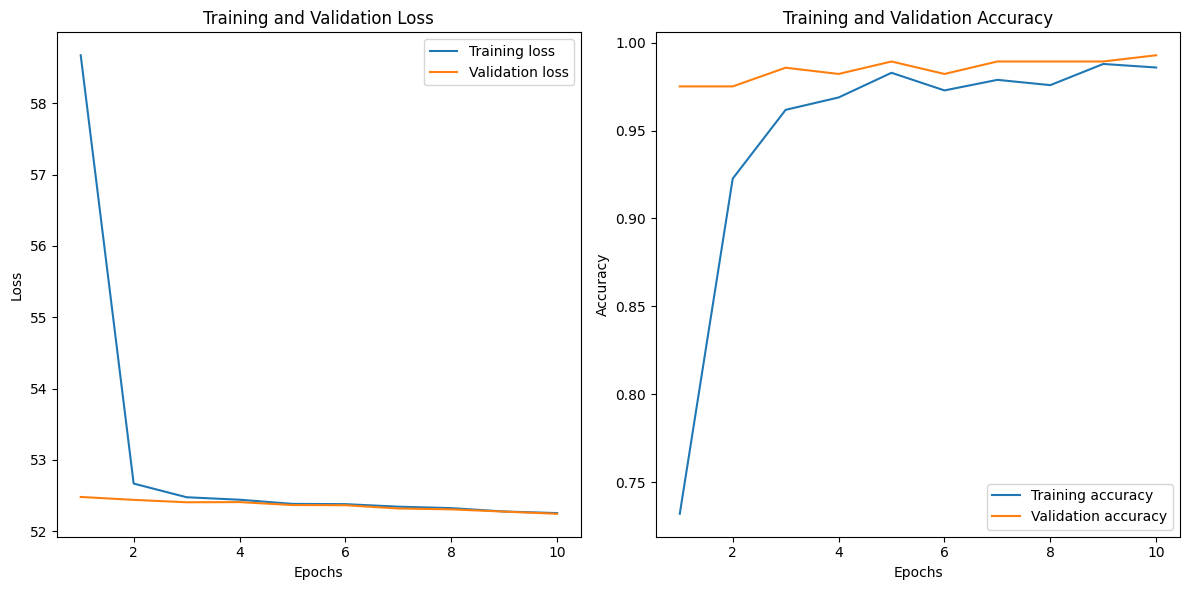

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


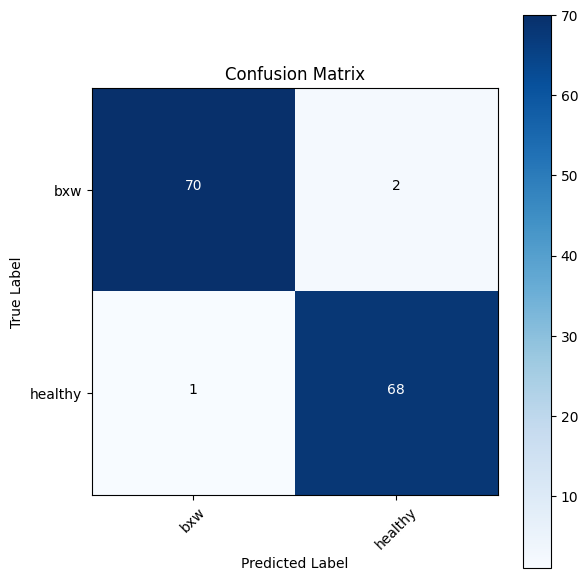

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
              precision    recall  f1-score   support

         bxw       0.99      0.97      0.98        72
     healthy       0.97      0.99      0.98        69

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141



In [28]:
def model_4():
    model = tf.keras.models.Sequential()

    regularizer = tf.keras.regularizers.l1(0.001)  # L1 regularization

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout layer

    model.add(tf.keras.layers.Dense(len(le.classes_), activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)  # RMSprop optimizer

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 3. Create the model
model = model_4()

# 5. Training
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[early_stopping])

# Save the model
model.save("fourth_model.keras")

# Load the model
loaded_model = tf.keras.models.load_model("fourth_model.keras")

# 8. Evaluation
_, test_results = model.evaluate(test_dataset, verbose=0)
_, train_results = model.evaluate(train_dataset, verbose=0)
print('Test accuracy: %.3f, Train accuracy: %.3f' % (test_results, train_results))

# 6. Plotting Function (Loss and Accuracy Curves)
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  # Loss plot
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)  # Accuracy plot
    plt.plot(epochs, history.history['accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

loss_curve_plot(history)  # Call the plotting function

# 7. Confusion Matrix and Error Analysis
def plot_confusion_matrix(model, dataset, le):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred_batch = model.predict(images)
        y_pred.extend(np.argmax(y_pred_batch, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(model, test_dataset, le)

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# 8. Classification Report
y_true = []
y_pred = []
for images, labels in test_dataset:
  y_true.extend(labels.numpy())
  y_pred_batch = model.predict(images)
  y_pred.extend(np.argmax(y_pred_batch, axis=1))

print(classification_report(y_true, y_pred, target_names=le.classes_)) # Print report



              precision    recall  f1-score   support

         bxw       0.99      0.99      0.99        72
     healthy       0.99      0.99      0.99        69

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



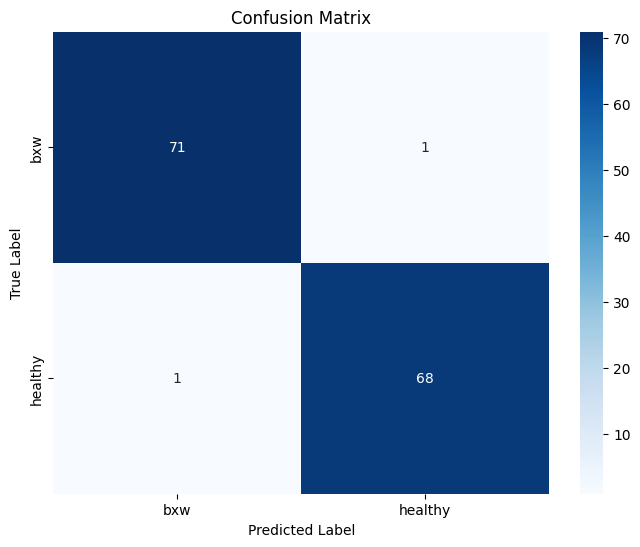

In [33]:

# 1. Data Loading and Preprocessing (Separate for Train, Validation, Test)
# *************************************************************************
# **SUBSTITUTE:** Replace with the actual paths to your data folders
# *************************************************************************
data_folders = {
    'train': '/content/dataset/train',  # Path to your train folder
    'validation': '/content/dataset/valid',  # Path to your validation folder
    'test': '/content/dataset/test'  # Path to your test folder
}

datasets = {}

for split, folder in data_folders.items():
    # *********************************************************************
    # **SUBSTITUTE:** Replace 'data.csv' with the actual name of your CSV file
    # *********************************************************************
    csv_path = os.path.join(folder, '_annotations.csv')
    # *********************************************************************
    # **SUBSTITUTE:** Replace 'images' with the actual name of your images subfolder
    # *********************************************************************
    image_folder = os.path.join(folder, 'images')
    df = pd.read_csv(csv_path)

    if split == 'train':
        le = LabelEncoder()
        # *****************************************************************
        # **SUBSTITUTE:** Replace 'class' with the actual name of your class column
        # *****************************************************************
        df['class_encoded'] = le.fit_transform(df['class'])
    else:
        df['class_encoded'] = le.transform(df['class'])

    image_data = []
    for filename in df['filename']:
        image_path = os.path.join(image_folder, filename)
        try:
            img = plt.imread(image_path)
            img_resized = tf.image.resize(img, [128, 128]).numpy()  # Resize images
            image_data.append(img_resized)
        except FileNotFoundError:
            print(f"Warning: Image not found: {image_path}")
            continue

    image_data = np.array(image_data)
    n_samples = image_data.shape[0]
    image_data_flattened = image_data.reshape(n_samples, -1)
    df_new = pd.DataFrame(image_data_flattened)
    df_new['class_encoded'] = df['class_encoded'].iloc[:n_samples].values

    datasets[split] = df_new

# 2. Prepare Data for Logistic Regression
X_train = datasets['train'].drop('class_encoded', axis=1)
y_train = datasets['train']['class_encoded']

X_validation = datasets['validation'].drop('class_encoded', axis=1)
y_validation = datasets['validation']['class_encoded']

X_test = datasets['test'].drop('class_encoded', axis=1)
y_test = datasets['test']['class_encoded']

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# 4. Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Evaluate the Model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

from joblib import dump, load

# Save the model
filename = 'logistic_regression_model.joblib'  # Choose a filename (often .joblib)
dump(model, filename)

# Load the model
loaded_model = load(filename)

# Improved Confusion Matrix Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:

# 1. Load your models
models = {}

# Example using joblib (replace with your actual filenames)
models['Model 1 (Logistic Regression)'] = load('logistic_regression_model.joblib')
models['Model 2 (Naive Bayes)'] = load('naive_bayes_model.joblib')
# ... load other models similarly (XGBoost, SVM, etc.)

# Example using tf.keras.models.load_model() for neural networks
# models['Model 3 (CNN)'] = tf.keras.models.load_model('cnn_model.h5')
# models['Model 4 (Another CNN)'] = tf.keras.models.load_model('another_cnn.h5')
# models['Model 5 (Dense Network)'] = tf.keras.models.load_model('dense_network.h5')

# 2. Load your test data (same data used for all models)
# ... (Load X_test and y_test - same data used to evaluate all models)

# 3. Evaluate and Compare Models

results = {}  # Store results for each model

for name, model in models.items():
    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)  # Get detailed report as dictionary
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {'accuracy': accuracy, 'classification_report': report, 'confusion_matrix': cm}

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))  # Print report

    # Plot confusion matrix (optional - helpful for visualization)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 4. Summarize and Visualize Comparison (Example)

# Compare accuracy across models
accuracy_scores = {name: result['accuracy'] for name, result in results.items()}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# You can add more visualizations or comparisons based on other metrics
# from the classification report (e.g., precision, recall, F1-score).

# Example: comparing F1-score for a specific class ('cat' in this example)

f1_cat = {name: result['classification_report']['cat']['f1-score'] for name, result in results.items()}

plt.figure(figsize=(10, 6))
plt.bar(f1_cat.keys(), f1_cat.values())
plt.title('F1-score Comparison for Class "cat"')
plt.ylabel('F1-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ... (Add more comparisons as needed)

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
